<a href="https://colab.research.google.com/github/mohcineelharras/sdf_case_study/blob/main/SDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation du cours : Sûreté de fonctionnement

## Import Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.linalg import expm, sinm, cosm

## Problem 1 

In [130]:
failure_dates=np.array([98474.4,
12373.4,
107318.4,
9739.7,
13000.1,
12207.7,
63589.4,
31893.8,
5784.9,
9662.7,
61731.1,
15269.2,
4730.0,
11269.2 ,
26947.1,
27838.1,
90682.5,
8086.6,
7905.6,
48162.7])
MTTF_PT=failure_dates.mean()
lambda_PT=1/failure_dates.mean()
lambda_AI=1e-07
lambda_CPU=6e-07
lambda_DO=1e-07
lambda_DCV=1e-06
lambda_dSDV=2.1e-06
lambda_fSDV=1.9e-05

MTTF_AI=1/lambda_AI
MTTF_CPU=1/lambda_CPU
MTTF_DO=1/lambda_DO
MTTF_DCV=1/lambda_DCV
MTTF_SDV=1/(lambda_dSDV+lambda_fSDV)

Text(0.5, 1.0, 'R_SDV(t)')

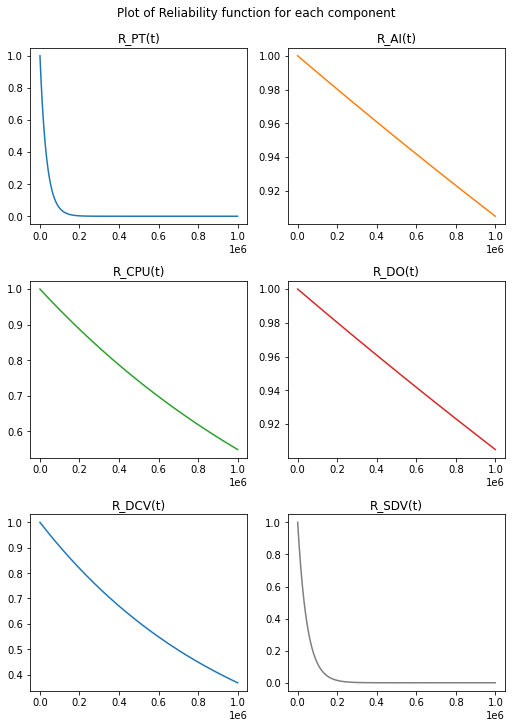

In [131]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(7,10),constrained_layout=True)

fig.suptitle('Plot of Reliability function for each component')
t=np.linspace(0,1000000,1000)
ax1.plot(t, np.exp(-lambda_PT*t))
ax1.set_title("R_PT(t)")
ax2.plot(t, np.exp(-lambda_AI*t), 'tab:orange')
ax2.set_title("R_AI(t)")
ax3.plot(t, np.exp(-lambda_CPU*t), 'tab:green')
ax3.set_title("R_CPU(t)")
ax4.plot(t, np.exp(-lambda_DO*t), 'tab:red')
ax4.set_title("R_DO(t)")
ax5.plot(t, np.exp(-lambda_DCV*t), 'tab:blue')
ax5.set_title("R_DCV(t)")
ax6.plot(t, np.exp(-(lambda_dSDV+lambda_fSDV)*t), 'tab:grey')
ax6.set_title("R_SDV(t)")
#ax7.plot(t, np.exp(-lammbda_fSDV*t), 'tab:purple')
#ax7.set_title("R_fSDV(t)")




In [132]:
MTTF_PT,MTTF_SDV,MTTF_DO,MTTF_CPU,MTTF_AI,MTTF_DCV

(33333.329999999994,
 47393.36492890995,
 10000000.0,
 1666666.6666666667,
 10000000.0,
 1000000.0)

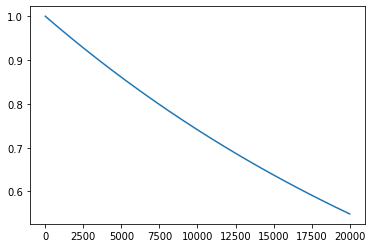

In [133]:
# PT a le mttf le plus petit, 
#donc on regarde quand est ce qu'il descend en dessous de 0.9 pour définir l'horizon
#MTTF_PT==min([MTTF])
t=np.linspace(0,20000,1000)
plt.plot(t, np.exp(-lambda_PT*t))

In [134]:
df=pd.DataFrame(t)
df["R_PT"]=np.exp(-lambda_PT*t)
print(df.head(180).to_string())
#3503.503504h  0.900230

               0      R_PT
0       0.000000  1.000000
1      20.020020  0.999400
2      40.040040  0.998800
3      60.060060  0.998200
4      80.080080  0.997600
5     100.100100  0.997002
6     120.120120  0.996403
7     140.140140  0.995805
8     160.160160  0.995207
9     180.180180  0.994609
10    200.200200  0.994012
11    220.220220  0.993415
12    240.240240  0.992819
13    260.260260  0.992223
14    280.280280  0.991627
15    300.300300  0.991031
16    320.320320  0.990436
17    340.340340  0.989842
18    360.360360  0.989247
19    380.380380  0.988653
20    400.400400  0.988060
21    420.420420  0.987467
22    440.440440  0.986874
23    460.460460  0.986281
24    480.480480  0.985689
25    500.500501  0.985097
26    520.520521  0.984506
27    540.540541  0.983915
28    560.560561  0.983324
29    580.580581  0.982733
30    600.600601  0.982143
31    620.620621  0.981554
32    640.640641  0.980964
33    660.660661  0.980375
34    680.680681  0.979787
35    700.700701  0.979198
3

## Problem 3

In [135]:
lambda_PT=3e-05
lambda_AI=1e-07
lambda_CPU=6e-07
lambda_DO=1e-07
lambda_DCV=1e-06
lambda_dSDV=2.1e-06
lambda_fSDV=1.9e-05
lambda_SDV=lambda_dSDV+lambda_fSDV
delta_mn=12
mu_mn=1/delta_mn

In [136]:
#******************************************** Q3  #********************************************
# Permet de résoudre un système d'équa diff avec la fonction odeint
# ---------------------------------Not really working---------------------------------
def deriv(P, t, A):
    return np.dot(A, P)

A = np.array([[-lambda_CPU-4*lambda_AI,            4*lambda_AI,                    0,                                 lambda_CPU],
               [0,                         -3*lambda_AI-lambda_CPU,            3*lambda_AI,                          lambda_CPU],
               [0,                                        0,               -lambda_CPU-2*lambda_AI,       lambda_CPU+2*lambda_AI],
               [mu_mn,                                    0,                      -0,                                  -mu_mn]])

time = np.linspace(0, 1000, 1000000)
#Conditions initiales
P0=np.array([1,0,0,0])
#Résolution
Pt = odeint(deriv, P0, time, args=(A,))
# On peut normer le vecteur obtenu pour récupérer des probas entre 0 et 1
normalized_Pt=Pt/Pt.sum(axis=1)[:,None]
Pt_df=pd.DataFrame(normalized_Pt,columns=["P3","P2","P1","P0"])
Pt_df["t"]=time
print("SOLUTION NUMBER 1, not working")
Pt_df.head(10)

SOLUTION NUMBER 1, not working


,P3,P2,P1,P0,t
0,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000
1,0.999917,2.499670e-14,3.332893e-14,0.000083,0.001
2,0.999833,9.997691e-14,1.333025e-13,0.000167,0.002
3,0.999750,2.249241e-13,2.998989e-13,0.000250,0.003
4,0.999667,3.998213e-13,5.330950e-13,0.000333,0.004
5,0.999584,6.246534e-13,8.328712e-13,0.000416,0.005
6,0.999500,8.994034e-13,1.199205e-12,0.000500,0.006
7,0.999417,1.224054e-12,1.632073e-12,0.000583,0.007
8,0.999334,1.598590e-12,2.131453e-12,0.000666,0.008
9,0.999251,2.022992e-12,2.697323e-12,0.000749,0.009


In [137]:
#******************************************** Q3  #********************************************
# Permet de trouver P(t)=P(0).exp(At)
# -------------------------------- Working---------------------------------
# Transition matrix
A = np.array([[-lambda_CPU-4*lambda_AI,            4*lambda_AI,                    0,                                 lambda_CPU],
               [0,                         -3*lambda_AI-lambda_CPU,            3*lambda_AI,                          lambda_CPU],
               [0,                                        0,               -lambda_CPU-2*lambda_AI,       lambda_CPU+2*lambda_AI],
               [mu_mn,                                    0,                      -0,                                  -mu_mn]])
#Time Horizon
time = np.linspace(0, 100000000, 1000)
#Conditions initiales
P0=[1,0,0,0]
Pt=[]
for i in range(len(time)):
  Pt.append(np.dot(np.array(P0),expm(A*time[i])))
Pt_df=pd.DataFrame(np.array(Pt),columns=["P3","P2","P1","P0"])
Pt_df["t"]=time
print("SOLUTION NUMBER 2, works perfectly")
Pt_df

SOLUTION NUMBER 2, works perfectly


,P3,P2,P1,P0,t
0,1.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.961896,0.037537,0.000561,0.000007,1.001001e+05
2,0.927448,0.070453,0.002093,0.000007,2.002002e+05
3,0.896318,0.099280,0.004395,0.000007,3.003003e+05
4,0.868203,0.124490,0.007299,0.000007,4.004004e+05
...,...,...,...,...,...
995,0.620685,0.275860,0.103448,0.000007,9.959960e+07
996,0.620685,0.275860,0.103448,0.000007,9.969970e+07
997,0.620685,0.275860,0.103448,0.000007,9.979980e+07
998,0.620685,0.275860,0.103448,0.000007,9.989990e+07


In [138]:
t=2
Pt_df.iloc[t] 

P3         0.927448
P2         0.070453
P1         0.002093
P0         0.000007
t     200200.200200
Name: 2, dtype: float64

In [139]:
#******************************************** Q4  #********************************************
# Pour trouver les probabilités en régime permanent, on procède comme suivant :
# on choisit les 3 premières lignes et on rajoute la 4 ème condition qui est sum(P)=1
# Ainsi, on définit la nouvelle matrice A_steady
A_steady = np.array([[-lambda_CPU-4*lambda_AI,    0,    0,    mu_mn],
                    [ 4*lambda_AI,    -3*lambda_AI-lambda_CPU,    0,   0],
                    [    0,     3*lambda_AI,  -lambda_CPU-2*lambda_AI,   0],
                    [    1,         1,         1,         1]])
# Steady state
z = np.linalg.solve(A_steady,np.array([0,0,0,1]).reshape(-1,1))
for i in range(4):
  print("P"+str(3-i),z[i],)
print("")
print("sum == 1 ?",z.sum())

# Check this steady state values
# On verifie le résultat précedent avec la valeur de P3(oo) qui a été trouvée analytiquement
P3 = 1/((delta_mn*(lambda_CPU+4*lambda_AI))+
        (4*lambda_AI)/(3*lambda_AI+lambda_CPU)+
        (12*lambda_AI**2)/((lambda_CPU+3*lambda_AI)*(lambda_CPU+2*lambda_AI))+
        1)
print("")
print("P3(oo)=",P3)

P3 [0.62068503]
P2 [0.27586001]
P1 [0.10344751]
P0 [7.44822039e-06]

sum == 1 ? 0.9999999999999999

P3(oo)= 0.620685032139071


In [140]:
#********************************************  Q5  ********************************************
# Calculate availability
# On choisit un horizon 
# On a les probas Pi(t) dans le vecteur Pt_df
from scipy.integrate import simps

P3=Pt_df.P3
P2=Pt_df.P2
P1=Pt_df.P1
t=Pt_df.t

dispo = P3+P2+P1
mean_time_functionning = simps(P3+P2+P1, t)
functining_rate=mean_time_functionning/list(t)[-1]
print("horizon",list(t)[-1])
print("mean_time_functionning",mean_time_functionning)
print("functining_rate", functining_rate)


horizon 100000000.0
mean_time_functionning 99999255.92466764
functining_rate 0.9999925592466764


## Problem 4

In [141]:
# IMPORT
import numpy as np

# Parameters declaration
lambda01 = 2.1E-6
lambda12 = 1.9E-5
perInsp = 8760
#horizonTime = perInsp*100
#delta=6 neglected
horizonTime = 100 * 365 * 24
nb_state1=0
nb_state2=0
nb_state3=0
nbRenewal = 0
nbPrevMaint = 0
nbFailure = 0
nbCorrMaint = 0

nbExperience=100000
for i in range(nbExperience):

      # Current State initialization
  currentState = 0
  currentTime = 0

  # Variables initialization
  timeState = np.zeros((3, ), dtype=float)
  

  # While the stopping criteria is not reached
  while (currentTime<horizonTime):
      if (currentState==0):
          # Evaluate concurrent transitions and determine the actual one
          dT = np.random.exponential(1/lambda01)
          # Update variables
          currentTime = currentTime+dT
          if currentTime<=horizonTime:
            timeState[currentState] = timeState[currentState]+dT
            currentState = 1
      elif (currentState==1):
          # Evaluate concurrent transitions and determine the actual one
          n = np.floor(currentTime/perInsp)
          dT10 = (n+1*(n*perInsp<currentTime))*perInsp-currentTime
          dT12 = np.random.exponential(1/lambda12)
          dT = np.min([dT10, dT12])       # order is significant
          # Update variables
          currentTime = currentTime+dT
          if currentTime<horizonTime:
            timeState[currentState] = timeState[currentState]+dT
            if (dT==dT10):
                nbPrevMaint = nbPrevMaint+1
                nbRenewal = nbRenewal+1
                currentState = 0
            elif (dT==dT12):
                nbFailure = nbFailure+1
                currentState = 2
            else:
                raise ValueError('Approximation error')
      elif (currentState==2):
          # Evaluate concurrent transitions and determine the actual one
          n = np.floor(currentTime/perInsp)
          dT = (n+1*(n*perInsp<currentTime))*perInsp-currentTime
          # Update variables
          currentTime = currentTime+dT
          if currentTime<horizonTime:
            timeState[currentState] = timeState[currentState]+dT
            nbCorrMaint = nbCorrMaint+1
            nbRenewal = nbRenewal+1
            currentState = 0
      else:
          raise ValueError('Unknown state')
  if currentState==0 :
    nb_state1=nb_state1+1
  elif currentState==1 :
    nb_state2=nb_state2+1
  elif currentState==2 :
    nb_state3=nb_state3+1
  else:
    raise ValueError('Unknown state' + str(currentState))

print("Probabilité d'être à l'état 1 = ",nb_state1/nbExperience)
print("Probabilité d'être à l'état 2 = ",nb_state2/nbExperience)
print("Probabilité d'être à l'état 3 = ",nb_state3/nbExperience)



Probabilité d'être à l'état 1 =  0.98149
Probabilité d'être à l'état 2 =  0.01725
Probabilité d'être à l'état 3 =  0.00126
